In [4]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.stats import ttest_ind
import time
import os
import pickle

## import self-written packages 
from adafdr.util import *
import adafdr.method as md
import adafdr.data_loader as dl

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generate figures

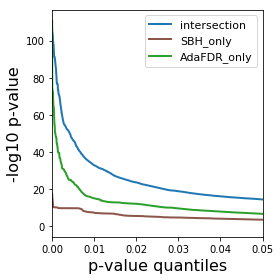

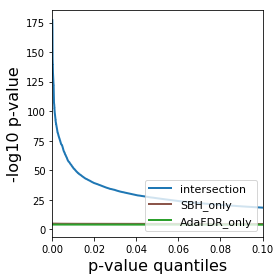

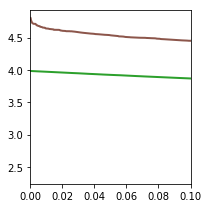

# Intersection: total=1575449, total match=203810
# SBH: total=42586, total match=4014
# nfdr: total=459618, total match=68311


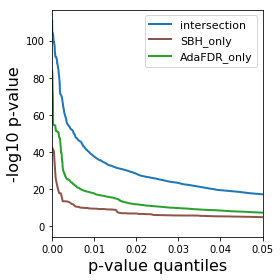

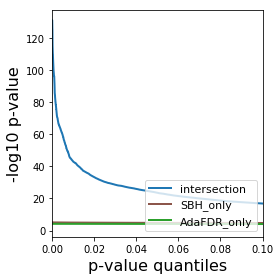

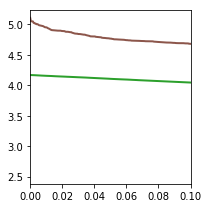

# Intersection: total=1047329, total match=128435
# SBH: total=29099, total match=2376
# nfdr: total=343256, total match=52150


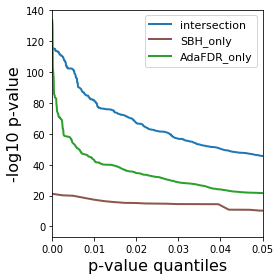

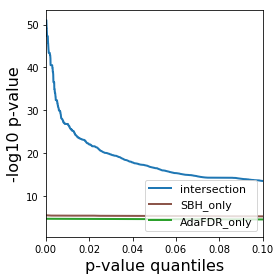

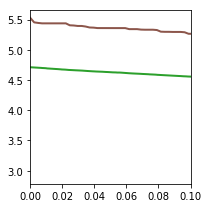

# Intersection: total=284616, total match=31357
# SBH: total=6782, total match=405
# nfdr: total=140307, total match=20785


In [30]:
def plot_cdf_p(p_value, label=None, color=None):
    p_value = p_value[p_value<1]
    temp = p_value.shape[0]
    plt.plot(np.arange(temp)/temp, -np.log10(np.sort(p_value)), label=label,\
             color=color, linewidth=2)
# Figure: full gtex
data_list = ['Adipose_Subcutaneous', 'Adipose_Visceral_Omentum',
             'Cells_EBV-transformed_lymphocytes']
# data_list = ['Adipose_Subcutaneous']
# data_list = ['Cells_EBV-transformed_lymphocytes']
input_folder = '/home/martin/NeuralFDR2/result_downstream_v1'
output_folder = '/home/martin/NeuralFDR2/figures/fig_compare_MuTHER'
for data_name in data_list:
    # Load data.
    fil = open(input_folder+'/p_overlap_%s.pickle'%data_name,'rb') 
    n_counts = pickle.load(fil)
    p_MuTHER_intersect = pickle.load(fil)
    p_MuTHER_sbh = pickle.load(fil)
    p_MuTHER_nfdr = pickle.load(fil)
    fil.close()
    # p-values on MuTHER
    plt.figure(figsize=[4, 4])
    plot_cdf_p(p_MuTHER_intersect[:,0], label='intersection', color='C0')
    plot_cdf_p(p_MuTHER_sbh[:,0], label='SBH_only', color='C5')
    plot_cdf_p(p_MuTHER_nfdr[:,0], label='AdaFDR_only', color='C2')
    plt.xlim([0, 0.05])
    plt.legend(loc = 'upper right', fontsize=11)
    plt.ylabel('-log10 p-value', fontsize=16)
    plt.xlabel('p-value quantiles', fontsize=16)
#     plt.title(data_name, fontsize=16)
    plt.tight_layout()
    plt.savefig(output_folder + '/fig_%s_MuTHER'%data_name + '.png')
    plt.savefig(output_folder + '/fig_%s_MuTHER'%data_name + '.pdf')
    plt.show()    
    # p-values on GTEx
    plt.figure(figsize=[4, 4])
    plot_cdf_p(p_MuTHER_intersect[:,1], label='intersection', color='C0')
    plot_cdf_p(p_MuTHER_sbh[:,1], label='SBH_only', color='C5')
    plot_cdf_p(p_MuTHER_nfdr[:,1], label='AdaFDR_only', color='C2')
    plt.xlim([0, 0.1])
    plt.legend(loc = 'lower right', fontsize=11)
    plt.ylabel('-log10 p-value', fontsize=16)
    plt.xlabel('p-value quantiles', fontsize=16)
#     plt.title(data_name, fontsize=16)
    plt.tight_layout()
    plt.savefig(output_folder + '/fig_%s_gtex'%data_name + '.png')
    plt.savefig(output_folder + '/fig_%s_gtex'%data_name + '.pdf')
    plt.show()    
    plt.figure(figsize=[3, 3])
    plot_cdf_p(p_MuTHER_sbh[:,1], label='SBH_only', color='C5')
    plot_cdf_p(p_MuTHER_nfdr[:,1], label='AdaFDR_only', color='C2')
    plt.xlim([0, 0.1])
    plt.tight_layout()
    plt.savefig(output_folder + '/fig_%s_gtex_zoomin'%data_name + '.png')
    plt.savefig(output_folder + '/fig_%s_gtex_zoomin'%data_name + '.pdf')
    plt.show()   
    print('# Intersection: total=%d, total match=%d'
          %(n_counts[0], p_MuTHER_intersect.shape[0]))
    print('# SBH: total=%d, total match=%d'
          %(n_counts[1], p_MuTHER_sbh[:,0].shape[0]))
    print('# nfdr: total=%d, total match=%d'
          %(n_counts[2], p_MuTHER_nfdr.shape[0]))
    

# Debug

In [ ]:
p_MuTHER_intersect[:,0]